# Transzkripciós faktorok

A sejtműködés, génexpresszió szabályozásában központi szerepet játszanak a transzkripciós faktorok (TF). Ezeknek a DNS-hez való kötődése központi mozzanat a transzkripció folyamatában. A TF-ek nukleinsavhoz való kapcsolódása meghatározott szekvenciákon (*trancription factor binding site, TFBS*) történhet meg. Azonban azt is tudjuk, hogy ugyanazon TF nem feltétlenül teljesen azonos TFBS-ekhez kapcsolódik a DNS különböző szakaszain. Ezeket a nem teljesen egységes bázissorrendű szekvenciákat motif-nak nevezik a szakirodalomban.

A [MEF2](https://en.wikipedia.org/wiki/Mef2) transzkripciós faktor esetén például az ismert kötőhelyek szekvenciája (Wasserman & Sandelin, 2004) az alábbi táblázatban látható:

|TFBS |   |   |   |   |   |   |   |   |   |    |    |    |    |    |
|-----|---|---|---|---|---|---|---|---|---|----|----|----|----|----|
|1    | G | A | C | C | A | A | A | T | A | A  | G  | G  | C  | A  |
|2    | G | A | C | C | A | A | A | T | A | A  | G  | G  | C  | A  |
|3    | T | G | A | C | T | A | T | A | A | A  | A  | G  | G  | A  |
|4    | T | G | A | C | T | A | T | A | A | A  | A  | G  | G  | A  |
|5    | T | G | C | C | A | A | A | A | G | T  | G  | G  | T  | C  |
|6    | C | A | A | C | T | A | T | C | T | T  | G  | G  | G  | C  |
|7    | C | A | A | C | T | A | T | C | T | T  | G  | G  | G  | C  |
|8    | C | T | C | C | T | T | A | C | A | T  | G  | G  | G  | C  |
|i:   | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 |

Ismert transzkripciós faktorok további lehetséges kötődési helyének meghatározásával (predikciójával) foglalkozó kutatásokban alkalmazott bioinformatikai elemzések ezekből az ismert TFBS-szekvenciákból indulnak ki. Kézenfekvő megközelítés lenne, hogy az ismert TFBS-szekvenciák konszenzusát használják a predikcióhoz.


In [16]:
library(Biostrings)

TFBSs.seqs = c('GACCAAATAAGGCA', 'GACCAAATAAGGCA', 'TGACTATAAAAGGA', 'TGACTATAAAAGGA', 
               'TGCCAAAAGTGGTC','CAACTATCTTGGGC', 'CAACTATCTTGGGC', 'CTCCTTACATGGGC')

TFBSs = DNAStringSet(TFBSs.seqs)

consensusString(TFBSs)


[1] "BRMCWAWHWWRGSM"

A konszenzus-szekvencia a nyolc kiindulási szekvencia információtartalmát ugyan sűrítette egyetlen [IUPAC-kódolású](https://www.bioinformatics.org/sms/iupac.html) szekvenciába, de egyúttal jelentősen csökkentette is az általa tárolt információt. Így növelve a kötési hely predikciójának megbízhatóságát. Pontosabb modelt jelent, ha a szekvencia minden pozíciójára vonatkozó nukleotidgyakorisági mátrixot (*position frequency matrix, PFM*) használunk:

In [17]:
consensusMatrix(TFBSs, baseOnly=TRUE)

A,0,4,4,0,3,7,4,3,5,4,2,0,0,4
C,3,0,4,8,0,0,0,3,0,0,0,0,2,4
G,2,3,0,0,0,0,0,0,1,0,6,8,5,0
T,3,1,0,0,5,1,4,2,2,4,0,0,1,0
other,0,0,0,0,0,0,0,0,0,0,0,0,0,0


A consensusMatrix()-függvény által létrehozott PFM első négy sora tartalmazza az A, C, G, T bázisokra vonatkozó gyakorisági értékeket.

In [18]:
pfm.count = consensusMatrix(TFBSs, baseOnly=T)[1:4,]

A TFBSTools-csomag (Tan & Lenhard, 2016) tartalmaz speciális objek tumokat és függvényeket, amelyek segítségével könnyen dolgozhatunk a TFBS-elemzésekben.

In [19]:
library(TFBSTools)

pfm = PFMatrix(name='MEF2', profileMatrix=pfm.count)

pfm

An object of class PFMatrix
ID: Unknown
Name: MEF2
Matrix Class: Unknown
strand: +
Tags: 
list()
Background: 
   A    C    G    T 
0.25 0.25 0.25 0.25 
Matrix: 
  [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
A    0    4    4    0    3    7    4    3    5     4     2     0     0     4
C    3    0    4    8    0    0    0    3    0     0     0     0     2     4
G    2    3    0    0    0    0    0    0    1     0     6     8     5     0
T    3    1    0    0    5    1    4    2    2     4     0     0     1     0

Vannak esetek, amikor a PFM-et nem gyakorisági értékekkel használják, hanem az egyes pozíciókban előforduló nukleotidok valószínűségével:


$p(b,i) = \cfrac{f_{b,i}+s(b)}{N+ \sum_{b'\in\{A,C,G,T\}}s(b')}\ ,$


ahol $f_{b,i}$ a $b$ nukleotid gyakorisága az $i$ pozícióban; $N$ a szekvenciák száma; $p(b,i)$ a $b$ nukleotid $i$ pozícióban való előfordulásának korrigált valószínűsége; $s(b)$ ún. pseudocount-függvény. Az átszámítást az alábbiak szerint végezhetjük:

In [20]:
pseudocount = sqrt(length(TFBSs.seqs))
pfm.prob = toPWM(pfm, type='prob', pseudocounts=pseudocount)
pfm.prob

An object of class PWMatrix
ID: Unknown
Name: MEF2
Matrix Class: Unknown
strand: +
Pseudocounts: 2.828427
Tags: 
list()
Background: 
   A    C    G    T 
0.25 0.25 0.25 0.25 
Matrix: 
        [,1]       [,2]       [,3]       [,4]       [,5]       [,6]       [,7]
A 0.06530097 0.43469903 0.43469903 0.06530097 0.34234952 0.71174758 0.43469903
C 0.34234952 0.06530097 0.43469903 0.80409709 0.06530097 0.06530097 0.06530097
G 0.25000000 0.34234952 0.06530097 0.06530097 0.06530097 0.06530097 0.06530097
T 0.34234952 0.15765048 0.06530097 0.06530097 0.52704855 0.15765048 0.43469903
        [,8]       [,9]      [,10]      [,11]      [,12]      [,13]      [,14]
A 0.34234952 0.52704855 0.43469903 0.25000000 0.06530097 0.06530097 0.43469903
C 0.34234952 0.06530097 0.06530097 0.06530097 0.06530097 0.25000000 0.43469903
G 0.06530097 0.15765048 0.06530097 0.61939806 0.80409709 0.52704855 0.06530097
T 0.25000000 0.25000000 0.43469903 0.06530097 0.06530097 0.15765048 0.06530097

Az eredményből látható, hogy a `PFMatrix` típusú objektumból egy `PWMatrix`-objektum jött létre a `toPWM()`-fügvénnyel, aminek a `pseudocounts` argumentumának  Wasserman & Sandelin (2004) ajánlásának megfelelően a TFBS szekvenciák számának négyzetgyökét adtuk meg. A pseudocount értéke ettől eltérő is lehet.  
Gyakori, hogy a PFM-et ún. *position weight matrix*-ként (PWM) használják, amit neveznek *position-specific scoring matrix*nak (PSSM) is. Annak ellenére, hogy ebben a csomagban ezt az eredményként mátrixot `PWMatrix`-nak nevezik, ez valójában még egy PFM. A PWM adott nukleotid, adott pozícióbeli megfigyelt és a várható háttér-valószínűségének $log_2$ transzformált hányadosa:

$W_{b,i} = \log_2\cfrac{p(b,i)}{p(b)}\ , $

ahol $p(b)$ a $b$ nukleotid előfordulásának háttér-valószínűsége; $p(b,i)$ a $b$ nukleotid $i$ pozícióbeli előfordulásának korrigált valószínűsége; $W_{b,i}$ a $b$ nukleotid $i$ pozícióbeli PWM-értéke. Az előző `toPWM()`-függvény `type='log2probratio'` beállításával hozhatjuk létre:

In [21]:
pwm = toPWM(pfm, type='log2probratio', pseudocounts=pseudocount)
pwm

An object of class PWMatrix
ID: Unknown
Name: MEF2
Matrix Class: Unknown
strand: +
Pseudocounts: 2.828427
Tags: 
list()
Background: 
   A    C    G    T 
0.25 0.25 0.25 0.25 
Matrix: 
        [,1]       [,2]       [,3]      [,4]       [,5]       [,6]       [,7]
A -1.9367518  0.7980888  0.7980888 -1.936752  0.4535419  1.5094376  0.7980888
C  0.4535419 -1.9367518  0.7980888  1.685442 -1.9367518 -1.9367518 -1.9367518
G  0.0000000  0.4535419 -1.9367518 -1.936752 -1.9367518 -1.9367518 -1.9367518
T  0.4535419 -0.6651985 -1.9367518 -1.936752  1.0760078 -0.6651985  0.7980888
        [,8]       [,9]      [,10]     [,11]     [,12]      [,13]      [,14]
A  0.4535419  1.0760078  0.7980888  0.000000 -1.936752 -1.9367518  0.7980888
C  0.4535419 -1.9367518 -1.9367518 -1.936752 -1.936752  0.0000000  0.7980888
G -1.9367518 -0.6651985 -1.9367518  1.308939  1.685442  1.0760078 -1.9367518
T  0.0000000  0.0000000  0.7980888 -1.936752 -1.936752 -0.6651985 -1.9367518

A PWM alapján, adott szekvenciára kiszámolható egy összestett pontszám (*site score*), ami nagy számú és reprezentatív TFBS szekvencia esetén arányos a kötődési energiával (King & Roth, 2003).

$S = \sum_{i=1}^w W_{l_i,i}\ ,$

ahol $S$ a szekvencia PWM-pontszáma; $l_i$ az $i$ pozícióban lévő nukleotid; $w$ a PWM szélessége. 
Például a fenti PWM alapján a `TTACATAAGTAGTC` szekvenciára számított pontszám:

In [22]:
m = Matrix(pwm)
iseq = 'TTACATAAGTAGTC'
site.score = c()

for(i in 1:nchar(iseq)){
  s = substr(iseq, i, i)
  site.score = c(site.score, m[s, i])
}
site.score


T          T          A          C          A          T          A 
 0.4535419 -0.6651985  0.7980888  1.6854416  0.4535419 -0.6651985  0.7980888 
         A          G          T          A          G          T          C 
 0.4535419 -0.6651985  0.7980888  0.0000000  1.6854416 -0.6651985  0.7980888

In [23]:
sum(site.score)

[1] 5.26307

A szekvencia összesített pontszámának abszolút érteke nem sokat mond arról, hogy a többi, már ismert kötőhely szekvenciájához hogyan viszonyul. Ezért az a szokás, hogy a PWM alapján számított legkisebb és legnagyobb összesített szekvencia pontszám alapján létrehozott eloszláshoz hasonlítják a vizsgált szekvencia összpontszámát. A példában szereplő PWM esetén az 5.26-os érték azt jelenti, hogy az összes lehetséges szekvencia 78%-a kisebb összesített pontszámmal rendelkezik.
A PWM további fontos jellemzője az információtartalom profil (information content profile, IC, Schneider et al. (1986)). Az IC-t bitekben fejezik ki és a DNS-szekvencia esetében az értéke 0 és 2 bit között változhat. Egy olyan i pozícióban, ahol mindegyik nukleotid egyforma valószínűséggel fordulhat elő az IC = 0, míg egy olyan $i$ pozícióban, ahol egyetlen nukleotid fordulhat elő az $IC = 2$ (Bembom, 2017).

$IC_i = 2 + \sum_b p_{b,i}\log_2 p_{b,i}\ ,$

ahol IC i az i pozíció információ tartalma; a pb,i a b nukleotid i pozícióbeli korrigált valószínűsége. Azok a pozíciók, amelyek erősen konzervatívak és így kis toleranciával rendelkeznek a helyettesítésre vonatkozóan, magas IC-értékűek, míg a nagy helyettesítési toleranciájú pozíciók alacsony IC-értékűek (Bembom, 2017). A PFMatrix-ból ICMatrixot hozhatunk létre a toICM()-függvénnyel (A pseudocounts argumentumnak itt azért adtunk 0 értéket, hogy a Wasserman & Sandelin (2004) által bemutatott ábrát rekonstruáljuk):


In [24]:
icm = toICM(pfm, pseudocounts=0)
icm

An object of class ICMatrix
ID: Unknown
Name: MEF2
Matrix Class: Unknown
strand: +
Pseudocounts: 0
Schneider correction: FALSE
Tags: 
list()
Background: 
   A    C    G    T 
0.25 0.25 0.25 0.25 
Matrix: 
       [,1]       [,2] [,3] [,4]      [,5]      [,6] [,7]      [,8]       [,9]
A 0.0000000 0.29718047  0.5    0 0.3920872 1.2743811  0.5 0.1645207 0.43825316
C 0.1645207 0.00000000  0.5    2 0.0000000 0.0000000  0.0 0.1645207 0.00000000
G 0.1096805 0.22288535  0.0    0 0.0000000 0.0000000  0.0 0.0000000 0.08765063
T 0.1645207 0.07429512  0.0    0 0.6534787 0.1820544  0.5 0.1096805 0.17530126
  [,10]     [,11] [,12]      [,13] [,14]
A   0.5 0.2971805     0 0.00000000   0.5
C   0.0 0.0000000     0 0.17530126   0.5
G   0.0 0.8915414     2 0.43825316   0.0
T   0.5 0.0000000     0 0.08765063   0.0

A PWM-ek grafikus reprezentációjának általánosan használt eszköze az ún. sequence logo (Schneider & Stephens, 1990). A logók a szekvencia mindegyik pozíciójára a négy nukleotidot jelölő betűhalmot tartalmaz. Az oszlop magassága a pozíció IC-jével, míg az egyes betűk magassága a nukleotid adott pozícióbeli relatív gyakoriságával arányos. A seqLogo()-függvénnyel létrehozhatunk szekvencialogokat. Ha a függvény ic.scale argumentumának TRUE értéket adunk, akkor a nukleotidoknak megfelelő oszlopok magassága az IC-vel arányos lesz.

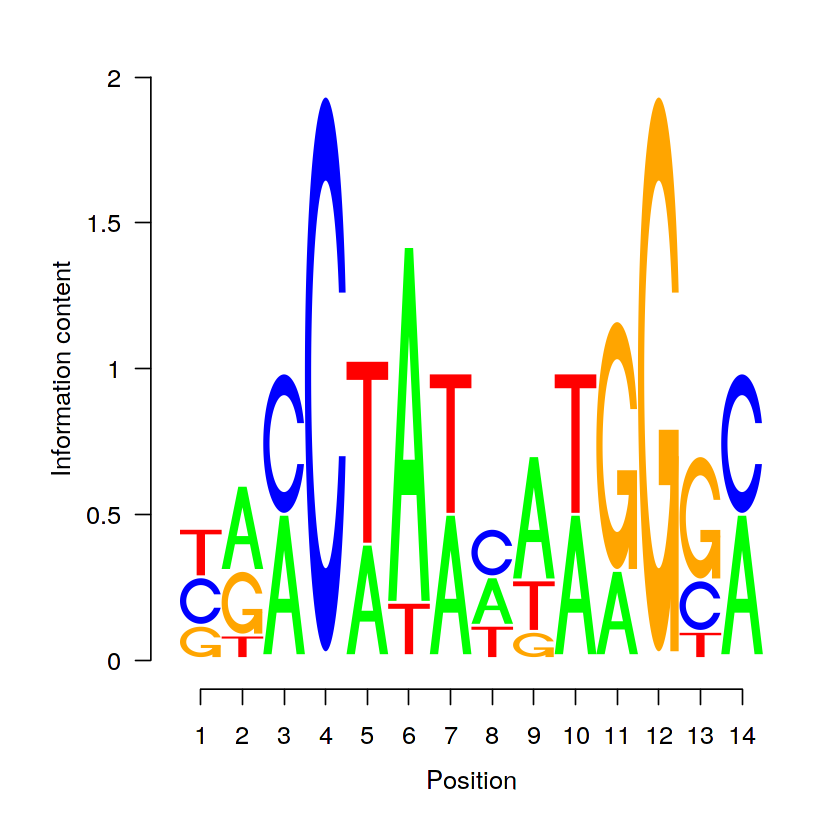

In [25]:
seqLogo(icm, ic.scale=T)

Ha ugyanennek az argumentumnak FALSE értéket adunk, akkor a logo oszlopai egyforma magasságúak lesznek és a betűk mérete a nukleotidok előfordulásának valószínűségét jelzi.

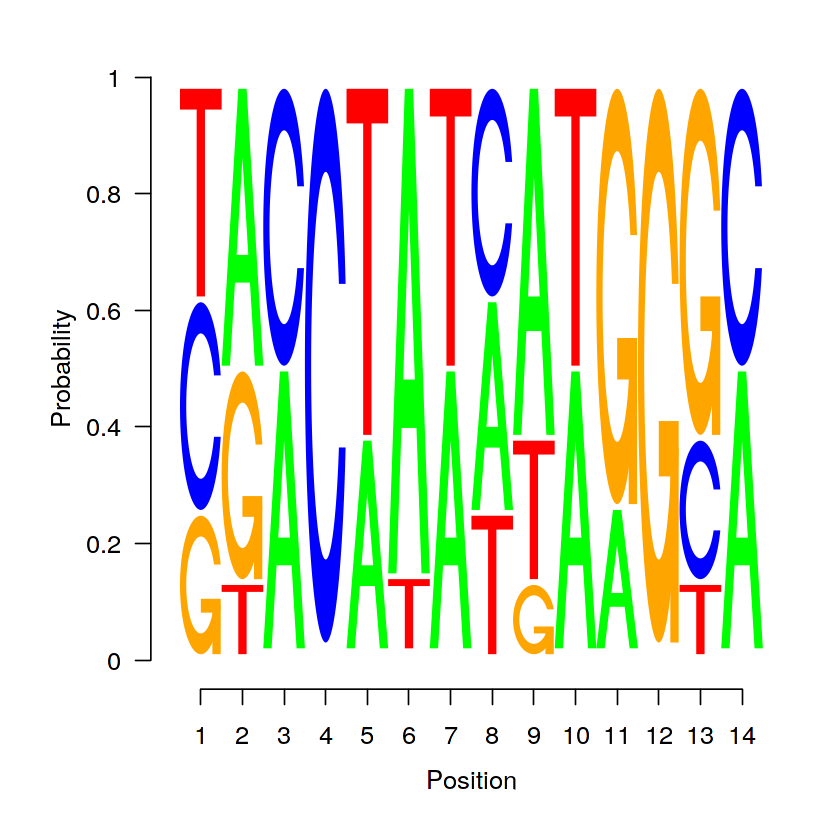

In [26]:
seqLogo(icm, ic.scale=F)

## Motif-adatbázisok

### MotifDb

Az ismert motif-ok jelenleg nem állnak rendelkezésre egyetlen szabad felhasználású forrásból, ezért gyűjtötték össze a különböző források, különböző liszenszelésű adatait a MotifDb-csomagba (Shannon, 2017). Az adatbázisból elérhető motifokra vonatkozó leíró inforációkat az alábbiak szerint kérdezhetjük le.

In [28]:
library(MotifDb)

MotifDb

See system.file("LICENSE", package="MotifDb") for use restrictions.


MotifDb object of length 8369
| Created from downloaded public sources: 2013-Aug-30
| 8369 position frequency matrices from 13 sources:
|         cispb_1.02:  874
|    FlyFactorSurvey:  614
|        HOCOMOCOv10: 1066
|              HOMER:  332
|               hPDI:  437
|        JASPAR_2014:  592
|        JASPAR_CORE:  459
|         jaspar2016: 1209
|          jolma2013:  843
|             ScerTF:  196
|            stamlab:  683
|       SwissRegulon:  684
|           UniPROBE:  380
| 52 organism/s
|           Hsapiens: 4094
|          Mmusculus: 1251
|      Dmelanogaster: 1147
|        Scerevisiae:  876
|          Athaliana:  351
|           Celegans:   67
|              other:  583
Scerevisiae-cispb_1.02-M0001_1.02 
Scerevisiae-cispb_1.02-M0002_1.02 
Scerevisiae-cispb_1.02-M0003_1.02 
Csativa-cispb_1.02-M0004_1.02 
Athaliana-cispb_1.02-M0005_1.02 
...
Mmusculus-UniPROBE-Zfp740.UP00022 
Mmusculus-UniPROBE-Zic1.UP00102 
Mmusculus-UniPROBE-Zic2.UP00057 
Mmusculus-UniPROBE-Zic3.UP00006 
M

Az adatbázisban elérhető mezők listája:

In [29]:
colnames(values(MotifDb))

[1] "providerName"    "providerId"      "dataSource"      "geneSymbol"     
 [5] "geneId"          "geneIdType"      "proteinId"       "proteinIdType"  
 [9] "organism"        "sequenceCount"   "bindingSequence" "bindingDomain"  
[13] "tfFamily"        "experimentType"  "pubmedID"

A motifok többféle eljárással kérdezhetők le az adatbázisból, a legegyszerűb a query()-függvény használata, pl. az összes humán motif kiolvasása:

In [30]:
query(MotifDb, 'Hsapiens')

MotifDb object of length 4094
| Created from downloaded public sources: 2013-Aug-30
| 4094 position frequency matrices from 10 sources:
|         cispb_1.02:  313
|        HOCOMOCOv10:  640
|               hPDI:  437
|        JASPAR_2014:  117
|        JASPAR_CORE:   66
|         jaspar2016:  442
|          jolma2013:  710
|            stamlab:  683
|       SwissRegulon:  684
|           UniPROBE:    2
| 1 organism/s
|           Hsapiens: 4094
Hsapiens-jolma2013-BCL6B 
Hsapiens-jolma2013-CTCF 
Hsapiens-jolma2013-EGR1 
Hsapiens-jolma2013-EGR1-2 
Hsapiens-jolma2013-EGR2 
...
Hsapiens-SwissRegulon-ZNF784.SwissRegulon 
Hsapiens-SwissRegulon-ZNF8.SwissRegulon 
Hsapiens-SwissRegulon-ZSCAN4.SwissRegulon 
Hsapiens-UniPROBE-Sox4.UP00401 
Hsapiens-UniPROBE-Oct_1.UP00399 

Ha több szempotot is szeretnénk érvényesíteni a lekérdezésben, akkor egymásba ágyazott query()-ket használhatunk:

In [31]:
mot1 = query(query(query(MotifDb, 'Hsapiens'), 'JASPAR_2014'), 'MEF2')
mot1

MotifDb object of length 2
| Created from downloaded public sources: 2013-Aug-30
| 2 position frequency matrices from 1 source:
|        JASPAR_2014:    2
| 1 organism/s
|           Hsapiens:    2
Hsapiens-JASPAR_2014-MEF2C-MA0497.1 
Hsapiens-JASPAR_2014-MEF2A-MA0052.2 

A kiválasztott motifhoz tartozó mátrix(ok) az alábbi szerint olvasható(k) ki a mot1-objektumból:

In [32]:
as.list(mot1)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
A,0.3191489,0.33182435,0.19511091,0.1729289,0.0000000,0.73155274,0.77229516,0.953825260,0.9646899049,0.966500679,0.02535084,0.98551381,0.17609778,0.44137619,0.45676777
C,0.1453146,0.06835672,0.08872793,0.6392033,0.4459031,0.11588954,0.01448619,0.000000000,0.0000000000,0.000000000,0.02806700,0.00000000,0.05432322,0.37845179,0.20371209
G,0.3060208,0.25939339,0.37211408,0.0353101,0.0000000,0.03349932,0.10909914,0.039384337,0.0009053871,0.001810774,0.00000000,0.01448619,0.75645088,0.06699864,0.05703938
T,0.2295156,0.34042553,0.34404708,0.1525577,0.5540969,0.11905840,0.10411951,0.006790403,0.0344047080,0.031688547,0.94658216,0.00000000,0.01312811,0.11317338,0.28248076
,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
A,0.3265445,0.1147318,0.07875085,0.0000000,0.863543788,0.68431772,0.93890020,0.917854718,0.94365241,0.00407332,0.9993211134,0.15682281,0.3985064,0.35980991,0.2342159
C,0.1004752,0.1011541,0.80040733,0.3211134,0.046164291,0.00000000,0.00000000,0.003394433,0.00000000,0.00000000,0.0000000000,0.03326544,0.4290563,0.27766463,0.3048201
G,0.2572980,0.4243041,0.02172437,0.0000000,0.009504413,0.08078751,0.02647658,0.000000000,0.00000000,0.00000000,0.0000000000,0.78750849,0.0760353,0.07467753,0.1378140
T,0.3156823,0.3598099,0.09911745,0.6788866,0.080787508,0.23489477,0.03462322,0.078750849,0.05634759,0.99592668,0.0006788866,0.02240326,0.0964019,0.28784793,0.3231500


A mátrixokat az adatbázis PFM formában tárolja, mégpedig úgy, hogy a mátrix mindegyik oszlopához, vagyis a motif szekvenciájának pozíciójához tartozó értékeket egyre normálja. Amennyiben a mátrix létrehozásához felhasznált szekvenciák száma ismert, akkor azt a
sequenceCount mezőből olvashatjuk ki:

In [36]:
as.matrix(values(mot1))

providerName,providerId,dataSource,geneSymbol,geneId,geneIdType,proteinId,proteinIdType,organism,sequenceCount,bindingSequence,bindingDomain,tfFamily,experimentType,pubmedID
MEF2C,MA0497.1,JASPAR_2014,MEF2C,4208,ENTREZ,Q06413,UNIPROT,Hsapiens,2209,NA,Other Alpha-Helix,MADS,ChIP-seq,7559475
MEF2A,MA0052.2,JASPAR_2014,MEF2A,4205,ENTREZ,Q02078,UNIPROT,Hsapiens,1473,NA,Other Alpha-Helix,MADS,ChIP-seq,1748287


Ennek felhasználásával előállítható pl. az első eredeti gyakorisági mátrix (PFM):

In [37]:
pfm1 = round(as.numeric(values(mot1)$sequenceCount[1])*as.list(mot1)[[1]])
pfm1

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
A,705,733,431,382,0,1616,1706,2107,2131,2135,56,2177,389,975,1009
C,321,151,196,1412,985,256,32,0,0,0,62,0,120,836,450
G,676,573,822,78,0,74,241,87,2,4,0,32,1671,148,126
T,507,752,760,337,1224,263,230,15,76,70,2091,0,29,250,624


### JASPAR2014, JASPAR2016

A TFBSTools-könyvtár objektumaival való munkához létrehoztak JASPAR3 adatbázisokat (Tan, 2014, 2015). A JASPAR 2016 a 2014-hez képest több TF-kötő profilt tartalmaz, a korábbi adatokat frissítették benne, illetve 130 TFFM is van már benne (Mathelier et al., 2016). A
2014-es adatbázisból az összes motif lekérdezése:

In [39]:
library(JASPAR2014)

opts = list()
getMatrixSet(JASPAR2014, opts)

PFMatrixList of length 593
names(593): MA0004.1 MA0006.1 MA0008.1 MA0009.1 ... MA0599.1 MA0600.1 MA0113.2

A 2016-os adatbázisban elérhető motifok:

In [40]:
library(JASPAR2016)

getMatrixSet(JASPAR2016, opts)

PFMatrixList of length 1082
names(1082): MA0004.1 MA0006.1 MA0010.1 MA0011.1 ... MA1096.1 MA1097.1 MA1098.1

A TFBSTools-könyvtár getMatrixSet()-függvény második paraméterével állíthatjuk be a lekérdezési szempontokat, így a korábban használt motif-ot az alábbi szerint olvashatjuk ki:

In [43]:
opts = list(species=9606, name='MEF2A', all_versions=TRUE)
qres = getMatrixSet(JASPAR2016, opts)
qres

PFMatrixList of length 3
names(3): MA0052.1 MA0052.2 MA0052.3

Mivel a lekérdezés eredménye egy lista, ezért annak elemeit így írathatjuk ki:

In [44]:
qres[[1]]

An object of class PFMatrix
ID: MA0052.1
Name: MEF2A
Matrix Class: Other Alpha-Helix
strand: +
Tags: 
$comment
[1] "-"

$family
[1] "MADS"

$medline
[1] "1748287"

$pazar_tf_id
[1] "TF0000034"

$tax_group
[1] "vertebrates"

$tfe_id
[1] "145"

$type
[1] "SELEX"

$collection
[1] "CORE"

$species
          9606 
"Homo sapiens" 

$acc
[1] "EAX02249"

Background: 
   A    C    G    T 
0.25 0.25 0.25 0.25 
Matrix: 
  [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
A    1    0   57    2    9    6   37    2   56     6
C   50    0    1    1    0    0    0    0    0     0
G    0    0    0    0    0    0    0    0    2    50
T    7   58    0   55   49   52   21   56    0     2

A JASPAR2014-csomagban van egy JASPAR2014SitesSeqs-objektum is, aminek a segítségével egyszerűen lekérdezhető a motifok kiindulási szekvenciái:

In [45]:
JASPAR2014SitesSeqs$MA0052.1

  A DNAStringSet instance of length 58
     width seq                                              names               
 [1]    26 ATGTGGGCTATTTATAGAAATTTCAG                       MA0052	MEF2A	1
 [2]    26 GGAGTCGCCTCTTAACTATTTATAGA                       MA0052	MEF2A	2
 [3]    26 AATGCGCGATGCACTATTTATAGTTC                       MA0052	MEF2A	3
 [4]    27 CTATTTATAGCTAGGACGAGTCGTTCC                      MA0052	MEF2A	4
 [5]    26 ACGCTTATTAAGTCTATTTATAGCCT                       MA0052	MEF2A	5
 ...   ... ...
[54]    26 GAAATTCTGATTTATATTTAGACTCC                       MA0052	MEF2A	54
[55]    26 ATTTAACCCGAGTTACTTATAACTGC                       MA0052	MEF2A	55
[56]    25 GTTGGACGTGATGCTATTTTAGACA                        MA0052	MEF2A	56
[57]    26 TGTTACTATTTTAGTCCGAGTACTGT                       MA0052	MEF2A	57
[58]    26 ATCGGAAGGAAGTTGATCTATTTATA                       MA0052	MEF2A	58

## Motifok, szekvenciák összehasonlítása

PFM-eket összehasonlíthatjuk a TFBSTools-könyvtár PFMSimilarity()-függvényével (Sandelin et al., 2003):

In [46]:
pfmORIG = qres[[1]]
PFMSimilarity(pfmORIG, pfmORIG)

score relScore 
      20      100

A score itt látható 100%-os egyezés (relScore) esetén a szekvencia hosszának kétszerese. Ha egy apró módosítást végzünk az egyik mátrixon, akkor az alábbi eredményt kapjuk:

In [47]:
tmp = Matrix(pfmORIG)
tmp[2,2] = 1000
tmp[4,2] = 22
pfmALT = PFMatrix(profileMatrix = tmp)
PFMSimilarity(pfmORIG, pfmALT)

score relScore 
18.08518 90.42589

Ugyanezzel a függvénnyel összehasonlíthatunk egy PFM-et és egy IUPAC-szekvenciát is, pl. a PFM-et és annak konszenzus szekvenciáját:

In [49]:
library(seqLogo)
pwmORIG = toPWM(pfmORIG, type='prob')
pwmALT = toPWM(pfmALT, type='prob')
seq = makePWM(Matrix(pwmORIG))@consensus
seq

[1] "CTATTTATAG"

In [50]:
PFMSimilarity(pfmORIG, seq)

score relScore 
19.59394 97.96968

PWM-ek összehasonlítására a TFBSTools-könyvtár PWMSimilarity()-függvényével három különböző módszeret használhatunk. Normalizált euklideszi távolság:

In [51]:
PWMSimilarity(pwmORIG, pwmALT, method='Euclidean')

[1] 0.09713072

A statisztika értéke 0 és 1 között változhat, a 0 teljes egyezőséget, az 1 teljes eltérést jelent. 

Pearson-korreláció:

In [52]:
PWMSimilarity(pwmORIG, pwmALT, method='Pearson')

[1] 0.8686435

A statisztika értéke -1 és 1 között változhat, az 1 teljes egyezőséget, a −1 teljes eltérést jelent.

Kullback-Leibler eltérés (Linhart et al., 2008):

In [53]:
PWMSimilarity(pwmORIG, pwmALT, method='KL')

[1] 0.461663

A két PWM eloszlásának eltérését vizsgáljuk ezzel a mértékkel, értéke 0 − 1 között változhat, a 0 erős hasonlóságot, az 1 nagy eltérést jelez.

## PWM keresése szekvenciában

A searchSeq()-függvénnyel vizsgálhatjuk, hogy a PWM-ünk mely DNS-szakaszra illeszkedik. Ha a fenti példa konszenzusszekvenciáját beillesztjük egy véletlen szekvenciába, az alábbi eredményt kapjuk:

In [54]:
set.seed(20)
rnd.seq.str = paste(sample(c('A', 'C', 'G', 'T'), 30, replace=TRUE), collapse='')
seq.str = paste(substr(rnd.seq.str, 1, 10), seq, substr(rnd.seq.str, 11, 30), sep='')
seq.str

[1] "TTCGTTAACCCTATTTATAGGTAGACCACTCACACATTAG"

In [55]:
seq.dns = DNAString(seq.str)
siteset = searchSeq(pwmORIG, seq.dns, seqname='teszt', strand='*', min.score=0.8)
siteset

An object of class SiteSet with 2 site sequences
  seqname source feature start end    score strand frame
1   teszt   TFBS    TFBS    11  20 8.877551      +     .
2   teszt   TFBS    TFBS    11  20 7.414966      -     .
                                            attributes
1 TF=MEF2A;class=Other Alpha-Helix;sequence=CTATTTATAG
2 TF=MEF2A;class=Other Alpha-Helix;sequence=CTATAAATAG

A min.score-argumentumban meghatározhatjuk, hogy a PWM és a vizsgált szekvencia között milyen mértékű eltérés fogadható még el, 0 − 1 vagy 0 − 100% közötti érték lehet. A PWM-ből létrehozható szekvenciák minimális és maximális összesített pontszámából számított eloszlásnak az illeszkedő szakaszok szűrésére használt percentilis határértéket jelenti.

A függvény eredménye egy SiteSet-objektum, azonban, ha az első argumentuma nem PWMatrix, hanem PWMatrixList, akkor SiteSetList-objektumot kapunk vissza.

In [56]:
qres.pwm = toPWM(qres, type='prob')
siteset = searchSeq(qres.pwm, seq.dns, seqname='teszt', strand='*', min.score=0.8)
siteset

SiteSetList of length 3
names(3): MA0052.1 MA0052.2 MA0052.3

A PWM szekvenciával való összehasonlítására használhatjuk a Biostrings-csomag függvényeit is:

In [57]:
pwm.B = PWM(Matrix(pfmORIG))
pwm.B

A,0.03016684,0.0000000,0.10184813,0.04118415,0.06768201,0.06033369,0.09379254,0.04118415,0.10151784,0.06033369
C,0.09940363,0.0000000,0.03016684,0.03016684,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.04118415,0.09940363
T,0.06311563,0.1021727,0.00000000,0.10118162,0.09902686,0.10013519,0.08327179,0.10151784,0.00000000,0.04118415


In [58]:
res.B = matchPWM(pwm.B, seq.dns, with.score=TRUE, min.score=0.8)
res.B

  Views on a 40-letter DNAString subject
subject: TTCGTTAACCCTATTTATAGGTAGACCACTCACACATTAG
views:
    start end width
[1]    11  20    10 [CTATTTATAG]

A Biostrings-csomagra épülően a PWMEnrich-csomag (Stojnic & Diez, 2015) további lehetőségeket nyújt PWM-ek szekvenciákra való illeszkedésének vizsgálatában. A csomag függvényeivel többek között azt vizsgálhatjuk (a Clover-hez hasonlóan (https:
//zlab.bu.edu/clover/), hogy egy adott szekcvenciában mely motif-ok vannak felülreprezentálva. Ahogy korábban láttuk a motif-oknak valamely szekvenciára való kötődését használhatjuk a TFBS predikciójára. Azonban a fent bemutatott módszer, illetve a legtöbb, a szakirodalomban fellelhető eljárás esetén meg kell határoznunk valamilyen a motif és a szekvencia hasonlóságára vonatkozó határértéket. Ahogy Frith et al. (2004) bemutatja, ha ez az érték alacsony, akkor sok nem „valódi” TF-et azonosíthatunk, mint olyat, ami a kérdéses szekvenciához kötődhet. Ha pedig túl magas, akkor „valóban” kötödő TF-eket veszíthetünk el. Azonkívűl ezek az eljárások nem kezelik azt, ha egy TF az adott szekvencián egynél több TFBS-el rendelkezik, illetve azt sem, hogy a teljes genomban vagy egy-egy kromoszómán milyen valószínűséggel kötődhet. Frith et al. (2004) által bemutatott
megközelítésben a TF-ekre vonatkozóan egy nagyobb genomszakaszra, vagy a teljes genomra meghatározzuk, hogy milyen ún. nyers pontszámmal (raw score) kötődnek. Majd a vizsgált szekvenciára is meghatározzuk ezt a pontszámot. Így a háttér ismeretében becsülhető, hogy milyen valószínűséggel kötődhet a TF a vizsgált szekvencián olyan (vagy annál nagyobb) nyers pontszámmal, amilyet számoltunk rá. Frith et al. (2004) szerint a p < 0.01 valószínűséggel kötődő TF-ek esetén alaposan feltételezhető, hogy az adott szakaszon felülreprezentált (over-represented), míg ha a p > 0.99, akkor alulreprezentált 
(under-represented). Továbbá, ha ilyen felül- vagy alulreprezentáltságot tapasztalunk, akkor annak funkcionális szerepe lehet. Mondjuk, hogy egy a humán 8. kromoszómán lévő szekvenciára kötődő TF-eket szeretnénk azonosítani. Ráadásul nem az összes ismert TF-re vagyunk kiváncsiak, hanem csak néhányra. Először a TF-eket kell megfelelő formátumba alakítani:

In [59]:
library(TFBSTools)
library(JASPAR2016)

opts = list(
  species=9606,
  name=c('AR', 'ETV1', 'FOXA1', 'GATA2', 'HOXB13', 'NKX3-1'),
  all_versions=TRUE
)

TF.set = getMatrixSet(JASPAR2016, opts)
lst = as.list(TF.set)
TF.lst = lapply(lst, Matrix)
names(TF.lst) = paste(as.character(lapply(lst, name)), names(TF.lst), sep='_')

A 8. humán kromoszómára lesz szükségünk a háttér létrehozásához, azonban mivel a szekvencia tartalmaz N-eket, ezeket ki kell törölnünk a továbbiakban használt függvényekhez. Ezt – többek között – tehetjük az alábbiak szerint:

In [62]:
library(BSgenome.Hsapiens.UCSC.hg19)

chr8 = as.character(BSgenome.Hsapiens.UCSC.hg19$chr8)
lst = strsplit(chr8, 'N')
lst = lst[[1]]
lst = lst[which(lapply(lst, nchar)!=0)]
chr8 = DNAStringSet(unlist(lst))


A PWMEnrich-könyvtár makePWMLognBackground()-függvényével hozhatunk létre saját lognormális háttér eloszlást valamely szekvenciá(k)ra, itt a 8. kromoszómára:

In [ ]:
library(PWMEnrich)

bg.logn = makeBackground(motifs=TF.lst, bg.seq=chr8, type='logn', algorithm='human')

A motifok szekvencián belüli alul- vagy felülreprezentáltságát ezek után az alábbiak szerint vizsgálhatjuk:

In [66]:
myseq = DNAString('TGCGTTCTCTTGGAGACTCTCTATTTGCCCCTCTCTTTTACAG')
res = motifEnrichment(myseq, bg.logn)
rpt = sequenceReport(res, 1)
rpt

Scanning sequence 1 / 1


Calculating motif enrichment scores ...


An object of class 'MotifEnrichmentReport':
  rank          target              id    raw.score   p.value
1    1  FOXA1_MA0148.1  FOXA1_MA0148.1 0.3001255927 0.3072201
2    2     AR_MA0007.2     AR_MA0007.2 0.0400636241 0.3281074
3    3  FOXA1_MA0148.2  FOXA1_MA0148.2 0.2398628307 0.3330050
4    4  FOXA1_MA0148.3  FOXA1_MA0148.3 0.0020333381 0.5656657
5    5  GATA2_MA0036.2  GATA2_MA0036.2 0.0002374392 0.6262785
6    6 NKX3-1_MA0124.1 NKX3-1_MA0124.1 0.0250463314 0.7531180
7    7   ETV1_MA0761.1   ETV1_MA0761.1 0.0002927674 0.9671194
8    8 HOXB13_MA0901.1 HOXB13_MA0901.1 0.0005775918 0.9709271
9    9  GATA2_MA0036.1  GATA2_MA0036.1 0.0426125957 0.9991309

Az eredményeket a plot()-függvénnyel vizualizálhatjuk is. A listából és az ábráról az látható, hogy egyedül a GATA2_MA0036.1 tekinthető alulreprezentáltnak.

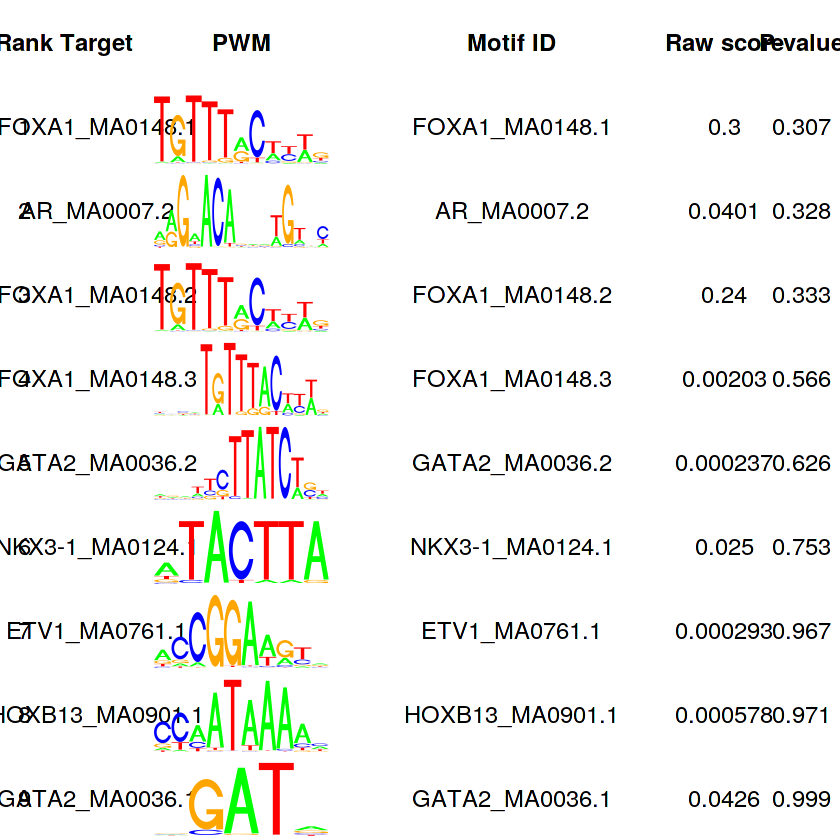

In [69]:
plot(rpt)

## „de novo” motif-azonosítás

Új motifok keresésére a TFBSTools-csomag is tartalmaz függvényt (runMEME), ami a MEME-t (http://meme-suite.org/) használja. Ehhez képest újabb és talán hatékonyabb módszert fejlsztett Li (2009), amit az rGADEM-csomag (Droit et al., 2014) segítségével alkalmazhatunk az R-en belül. A vizsgálatokból (pl. ChIP-seq) származó szekvencákat az alábbiak szerint elemezhetjük motif-tartalmukra vonatkozóan.

Az elemzésekhez szükségünk van a szekvenciákra, amelyeket az itt bemutatott példában FASTA-fájlban tárolunk, az állomány első három sora így néz ki:

```
>FOXA1 _ 1
CTACAGCTGTTCCTTGTCATCAGCCTGGGGGTGGGTAGTATTTTGATCTTAACGATGCCTGTTTGTTTACTCTGAGCTAGTCTTAGTGTAAGAGTCACCTC
TCTATGTACATAGAAACCGTTGTCCTTTATTGACAGAAGCCCTGGAGATGGGTCCCCATGTGACTGTAGGGTTCCTGAAACCTGGCAGGCCACTCTGCTTG
>FOXA1 _ 10
TTATTCTGATGTGGTTTTGCGGTTATACAGTAAGCAGCACTGCTTATGTGGACATGGTGTACTTTCAGTTTCTGAAAGTGAGTCATGTTGACTTTCCTCTG
AGGAGTAAGAGTGACCCTTGCTTAAAAGGACAACATGACTAGAAGGAAGAAACACCAGAGGCCACCAGGACCAGAATGTTTACCAATGTAGGCAGTCACTA
>FOXA1 _ 11
AAAGGAGAAACACAGCCAAATAATAAAACAATATCTTCTGTAAGTAAAGAGTACACCCCTGTTTACCTGGTCGCCACTGTTTATTCTGAAAGACTACACTA
AGCAAATACTGAGCCTGACAGCTAGGCTGGAGGGGAGGGGTCTCTAGGCCACAAAGGTGCAAAGCCCTCTTTCAGATCCATCTCCACCATTTCCCTTCAGG
```
Az R-ben így olvassunk be a szekvenciákat és alakítjuk át Biostrings objektummá:

In [71]:
library(rGADEM)

fasta.file = system.file('extdata/Test_100.fasta', package='rGADEM')
seqs = readDNAStringSet(fasta.file, 'fasta')
seqs

  A DNAStringSet instance of length 49
     width seq                                              names               
 [1]   202 CTACAGCTGTTCCTTGTCATCAG...ACCTGGCAGGCCACTCTGCTTG FOXA1 _ 1
 [2]   202 TTATTCTGATGTGGTTTTGCGGT...TTACCAATGTAGGCAGTCACTA FOXA1 _ 10
 [3]   202 AAAGGAGAAACACAGCCAAATAA...ATCTCCACCATTTCCCTTCAGG FOXA1 _ 11
 [4]   202 TGTACCCCCCCAATATTTCATGA...AACACTGAGCCTGGCATTCCAA FOXA1 _ 12
 [5]   202 TTTAAGACTGCCACCTGAAATCA...AGAAGACGGGTTGAGCGAGTCA FOXA1 _ 13
 ...   ... ...
[45]   202 ATTAGTTCATGCCAGGCAGGGTT...GTGGTTTGGAAACACCCTCATG FOXA1 _ 5
[46]   202 CCAGAGCCACCACAGCCAGGCCT...CCTGAAAACACCTGCTGTTTAA FOXA1 _ 6
[47]   202 CAGATCAGAGCCTGGGAGCGGGC...AGGGAAGGGAGCTGTGGGAGGA FOXA1 _ 7
[48]   202 GGAATGTGATTTACCCAGATAAA...AAACATGTCCACATGGAACCTG FOXA1 _ 8
[49]   202 GGCTTTTCCAAGAACAATAGTGT...TAAAGTCGGGTTGGTCCTTGGC FOXA1 _ 9

Továbbá szükség van a referenciaként szolgáló genomra:

In [72]:
library(BSgenome.Hsapiens.UCSC.hg19)

Hsapiens

Human genome:
# organism: Homo sapiens (Human)
# provider: UCSC
# provider version: hg19
# release date: Feb. 2009
# release name: Genome Reference Consortium GRCh37
# 93 sequences:
#   chr1                  chr2                  chr3                 
#   chr4                  chr5                  chr6                 
#   chr7                  chr8                  chr9                 
#   chr10                 chr11                 chr12                
#   chr13                 chr14                 chr15                
#   ...                   ...                   ...                  
#   chrUn_gl000235        chrUn_gl000236        chrUn_gl000237       
#   chrUn_gl000238        chrUn_gl000239        chrUn_gl000240       
#   chrUn_gl000241        chrUn_gl000242        chrUn_gl000243       
#   chrUn_gl000244        chrUn_gl000245        chrUn_gl000246       
#   chrUn_gl000247        chrUn_gl000248        chrUn_gl000249       
# (use 'seqnames()' to see all the sequence name

A két forrásállományt a GADEM-függvénnyel elemezhetjük:

In [73]:
gadem.res = GADEM(seqs, genome=Hsapiens)

top 3  4, 5-mers: 10 28 52
top 3  4, 5-mers: 8 24 44


In [74]:
gadem.res

	Object of class 'gadem' 
	This object has the following slots: 
	motifs,pwm,consensus,align,name,seq,chr,start,end,strand,seqID,pos,pval,fastaHeader


A számítások eredményeként az „új motifra” vonatkozóan létrejött objektumból többek között kiolvasható a PWM:

In [75]:
getPWM(gadem.res)

,1,2,3,4,5,6,7,8,9,10,11
A,0.4679,0.3542,0.4427,0.0005,0.0005,0.7206,0.9985,0.9859,0.0005,0.9985,0.2532
C,0.0510,0.1900,0.0131,0.0005,0.3416,0.2784,0.0005,0.0005,0.7458,0.0005,0.2658
G,0.0131,0.3416,0.0384,0.9985,0.0005,0.0005,0.0005,0.0131,0.0005,0.0005,0.2532
T,0.4679,0.1142,0.5058,0.0005,0.6574,0.0005,0.0005,0.0005,0.2532,0.0005,0.2279


A gadem.res-objektumból közvetlenül létrehozhatunk szekvencialogot az rGADEM-könyvtár saját plot()-függvényével, azonban ez nem túl rugalmas, így az ábrázolásban inkább érdemes a seqLogo-könyvtár függvényét használni:

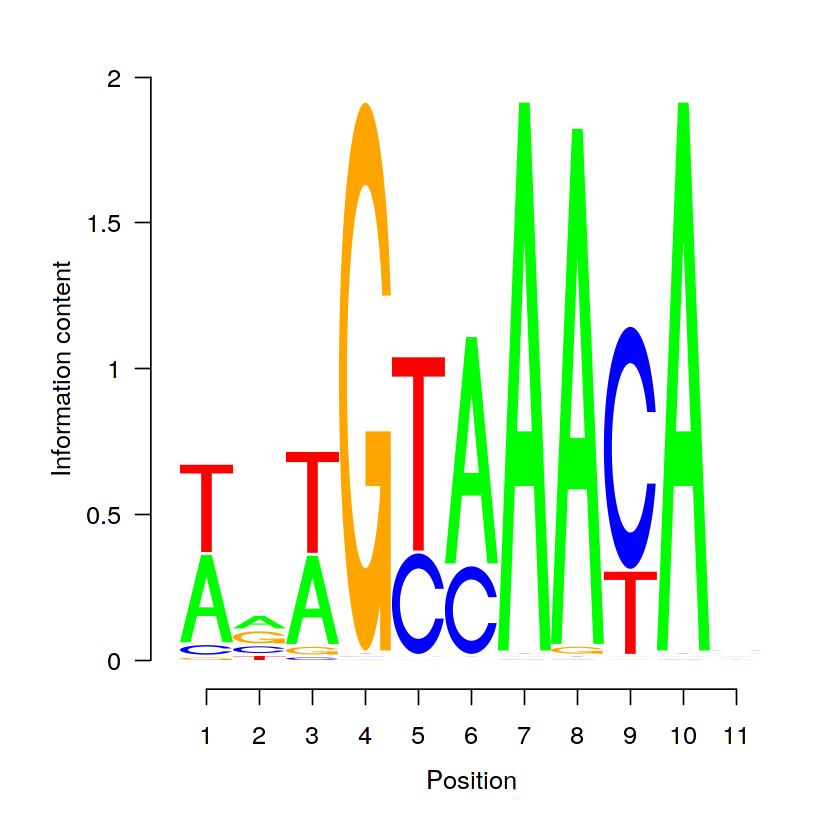

In [76]:
pwm.m = getPWM(gadem.res)[[1]]
seqLogo::seqLogo(pwm.m)

### motifStack

Több motif együttes ábrázolására hozták létre a motifStack-csomagot (Ou & Zhu, 2017). A csomag függvényei nagy rugalmasságot nyújtanak a vizualizációra, ezek közül egy egyszerűbb példa azt mutatja be, hogy egymással valamilyen szintű hasonlóságot mutató motifokat
hogyan tudjuk megjeleníteni:

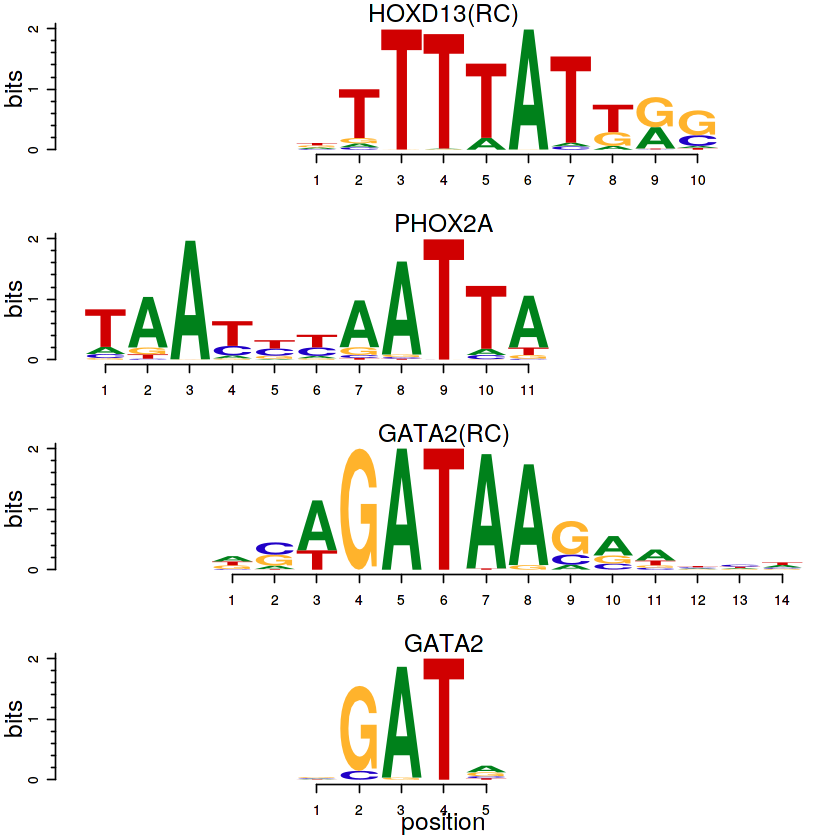

In [80]:
opts = list(species=9606, name=c('GATA2', 'PHOX2A', 'HOXD13'), all_versions=T)
qres = getMatrixSet(JASPAR2016, opts)

library(motifStack)

pfm.lst = list()
for(i in length(qres):1){
  mo = qres[[i]]
  m = Matrix(mo)
  pfm.lst[[i]] = new("pfm", mat=pcm2pfm(m), name=name(mo))
}

pfm.lst = DNAmotifAlignment(pfm.lst, threshold=0.8)
plotMotifLogoStack(pfm.lst)

## TFBS-en belüli SNP-k hatásának predikciója

Ahogy a genomban általánosságban, úgy a TF-kötőhelyeken is bekövetkeznek szekvenciális változások. Ennek ismeretében könnyen merül fel az a kérdés, hogy ezek a változások hogyan befolyásolják a génexpressziót? A kérdés megválaszolásához kapcsolódó motifbreakR-csomag (Coetzee et al., 2015) segítséget nyújt annak eldöntésében, hogy a polimorfizmus/mutációkörüli szekvencia jó kötést biztosít-e, illetve, hogy a megváltozott allél információvesztéssel, vagy -nyereséggel jár-e.

### Polimorfizmus adatok

Szekvencia polimorfizmusokra, variánsokra vonatkozóan számos adatbázis áll rendelkezésre. Ilyen pl. az NCBI dbSNP-je, amelyből a Bioconductor-on elérhetünk számos verziót:

In [2]:
library(BSgenome)

available.SNPs()

[1] "SNPlocs.Hsapiens.dbSNP.20101109"     
 [2] "SNPlocs.Hsapiens.dbSNP.20120608"     
 [3] "SNPlocs.Hsapiens.dbSNP141.GRCh38"    
 [4] "SNPlocs.Hsapiens.dbSNP142.GRCh37"    
 [5] "SNPlocs.Hsapiens.dbSNP144.GRCh37"    
 [6] "SNPlocs.Hsapiens.dbSNP144.GRCh38"    
 [7] "SNPlocs.Hsapiens.dbSNP149.GRCh38"    
 [8] "SNPlocs.Hsapiens.dbSNP150.GRCh38"    
 [9] "XtraSNPlocs.Hsapiens.dbSNP141.GRCh38"
[10] "XtraSNPlocs.Hsapiens.dbSNP144.GRCh37"
[11] "XtraSNPlocs.Hsapiens.dbSNP144.GRCh38"

Míg az SNPlocs-állományok csak SNP-ket (single nucleotide-polymorphism) tartalmaznak, addig az XtraSNPlocs-állományokban további molekuláris változatok (pl. in-del, multinucleotide-polymorphism) találhatók. Az SNPlocs-állományokból több módon lekérdezhetők SNP-k, pl.
azonosító alapján:

In [3]:
library(SNPlocs.Hsapiens.dbSNP150.GRCh38)

snpsById(SNPlocs.Hsapiens.dbSNP150.GRCh38, 'rs7837328', ifnotfound='drop')

GPos object with 1 position and 2 metadata columns:
      seqnames       pos strand |   RefSNP_id alleles_as_ambig
         <Rle> <integer>  <Rle> | <character>      <character>
  [1]        8 127410882      * |   rs7837328                R
  -------
  seqinfo: 25 sequences (1 circular) from GRCh38.p7 genome

Az rs7837328 azonosítójú SNP a lekérdezés szerint a 8. kromoszómán helyezkedik el, és vagy A vagy G lehet. Az SNP-azonosítót használhatjuk az rs előtag nélkül is, akár karakterként,
akár egész számként. Lekérdezhetjük azt is, hogy egy adott szekvenciaszakasz tartalmaz-e ismert SNP-t. Ehhez először létre kell hoznunk egy GRanges-objektumot amit kereshetünk a SNP-adatbázisban:

In [4]:
gr = GRanges(
  seqnames=c('8'),
  ranges=IRanges(127410880, 127410885),
  strand=c('*')
)

snpsByOverlaps(SNPlocs.Hsapiens.dbSNP150.GRCh38, ranges=gr)

GPos object with 1 position and 2 metadata columns:
      seqnames       pos strand |   RefSNP_id alleles_as_ambig
         <Rle> <integer>  <Rle> | <character>      <character>
  [1]        8 127410882      * |   rs7837328                R
  -------
  seqinfo: 25 sequences (1 circular) from GRCh38.p7 genome

Az XtraSNPlocs-állományokból hasonlóan olvashatunk ki adatokat. A 8. kromoszómán azonosított variánsok pl.:

In [7]:
q = snpsBySeqname(
    XtraSNPlocs.Hsapiens.dbSNP144.GRCh38, 
    'ch8', 
    columns=c('RefSNP_id', 'snpClass')
)

q

GRanges object with 606507 ranges and 2 metadata columns:
           seqnames                 ranges strand |   RefSNP_id snpClass
              <Rle>              <IRanges>  <Rle> | <character> <factor>
       [1]      ch8         [61481, 61482]      + | rs200678772   in-del
       [2]      ch8         [61793, 61793]      + | rs752636065   in-del
       [3]      ch8         [70901, 70901]      + | rs201602045   in-del
       [4]      ch8         [70950, 70950]      + | rs767986677   in-del
       [5]      ch8         [73088, 73088]      + | rs750775551   in-del
       ...      ...                    ...    ... .         ...      ...
  [606503]      ch8 [145076006, 145076005]      + | rs145524841   in-del
  [606504]      ch8 [145076464, 145076463]      + | rs199775790   in-del
  [606505]      ch8 [145077216, 145077215]      + | rs200565575   in-del
  [606506]      ch8 [145078174, 145078173]      + | rs574365224   in-del
  [606507]      ch8 [145078175, 145078174]      + | rs539896939   

A variánsok típusainak megoszlása a 8. kromoszómán:

In [8]:
table(elementMetadata(q)$snpClass)


                      in-del                 heterozygous 
                      596293                            0 
              microsatellite                  named-locus 
                         215                            0 
                no-variation                        mixed 
                           0                            0 
multinucleotide-polymorphism 
                        9999 

## Irodalomjegyzék

Bembom, O. (2017). seqLogo: Sequence logos for DNA sequence alignments. R package version 1.42.0.

Coetzee, S. G., Coetzee, G. A., & Hazelett, D. J. (2015). motifbreakR: an R/Bioconductor package for predicting variant effects at transcription factor binding sites. Bioinformatics, 31(23), 3847–3849.

Droit, A., Gottardo, R., Robertson, G., & Li, L. (2014). rGADEM: de novo motif discovery. R package version 2.24.0.

Frith, M. C., Fu, Y., Yu, L., Chen, J., Hansen, U., & Weng, Z. (2004). Detection of functional DNA motifs via statistical over-representation. Nucleic Acids Research, 32(4), 1372–1381.

King, O. D. & Roth, F. P. (2003). A non-parametric model for transcription factor binding sites. Nucleic Acids Res, 31, e116.

Li, L. (2009). GADEM: A Genetic Algorithm Guided Formation of Spaced Dyads Coupled with an EM Algorithm for Motif Discovery. Journal of Computational Biology, 16(2), 317–329.

Linhart, C., Halperin, Y., & Shamir, R. (2008). Transcription factor and microRNA motif discovery: the Amadeus platform and a compendium of metazoan target sets. Genome research, 18(7), 1180–1189.

Mahony, S., Auron, P. E., & Benos, P. V. (2007). DNA familial binding profiles made easy: comparison of various motif alignment and clustering strategies. PLoS Computational Biology, 3(3), e61.

Mahony, S. & Benos, P. V. (2007). STAMP: a web tool for exploring DNA-binding motif similarities. Nucleic Acid Research, 35, W253–258.

Mathelier, A., Fornes, O., Arenillas, D. J., Chen, C., Denay, G., Lee, J., Shi, W., Shyr, C., Tan, G., Worsley-Hunt, R., Zhang, A. W., Parcy, F., Lenhard, B., Sandelin, A., & Wasserman, W. W. (2016). JASPAR 2016: a major expansion and update of the open-access database of transcription factor binding profiles. Nucleic Acids Research, 44(Database-Issue), 110–115.

Mathelier, A. & Wasserman, W. W. (2013). The next generation of transcription factor binding site prediction. PLOS Computational Biology, 9(9), 1–18.

Mercier, E. & Gottardo, R. (2014). MotIV: Motif Identification and Validation. R package version 1.32.0.

Ou, J. & Zhu, L. J. (2017). motifStack: Plot stacked logos for single or multiple DNA, RNA and amino acid sequence. R package version 1.20.1.

Sandelin, A., Höglund, A., Lenhard, B., & Wasserman, W. W. (2003). Integrated analysis of yeast regulatory sequences for biologically linked clusters of genes. Functional & Integrative Genomics, 3(3), 125–134.

Schneider, T. D. & Stephens, R. R. (1990). A New Way to Display Consensus Sequences. Nucleic Acid Research, 18, 6097–6100.

Schneider, T. D., Stormo, G. D., Gold, L., & Ehrenfeucht, A. (1986). Information content of binding sites on nucleotide sequences. Journal of Molecular Biology, 188, 415–431.

Shannon, P. (2017). MotifDb: An Annotated Collection of Protein-DNA Binding Sequence Motifs. R package version 1.18.0.

Stojnic, R. & Diez, D. (2015). PWMEnrich: PWM enrichment analysis. R package version 4.12.0.

Tan, G. (2014). JASPAR2014: Data package for JASPAR. R package version 1.12.0.

Tan, G. (2015). JASPAR2016: Data package for JASPAR 2016. R package version 1.4.0.

Tan, G. & Lenhard, B. (2016). TFBSTools: an R/Bioconductor package for transcription factor binding site analysis. Bioinformatics, 32, 1555–1556.

Wasserman, W. W. & Sandelin, A. (2004). Applied bioinformatics for the identification of regulatory elements. Nature Reviews Genetics, 5, 276–287.


## Session info

In [9]:
sessionInfo()

R version 3.4.3 (2017-11-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 16.04.4 LTS

Matrix products: default
BLAS: /usr/local/lib/R/lib/libRblas.so
LAPACK: /usr/local/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=hu_HU.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=hu_HU.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=hu_HU.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=hu_HU.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] XtraSNPlocs.Hsapiens.dbSNP144.GRCh38_0.99.12
 [2] rGADEM_2.26.0                               
 [3] PWMEnrich_4.14.0                            
 [4] BSgenome.Hsapiens.UCSC.hg19_1.4.0           
 [5] seqLogo_1.44.0                              
 [6] JASPAR2016_